<h1 align="center">Principal Component Analysis</h1>

<br>

I made this quick tutorial on PCA to freshen my memory on PCA, and also for other people in the FMI group in case they want to learn the basics of PCA in python.

<br>

- When faced with a large set of correlated variables, principal components allow us to summarize this set with
a smaller number of representative variables that collectively explain most of the variability in the original set. 

- PCA is a dimensionality reduction technique. It finds a low-dimensional representation of a data set that contains as much as possible of the variation of the original data set and its features. In other words, the data is projected into a lower dimensional space, while trying to retain as much variance of the original data as possible.

- 100% of the variance of the data is explained by all of the p original features. That is, in PCA, we trade off some of the explained variance for less dimensions.

- When the principal components are found, they are constructed in such a way that they are **uncorrelated** with each other.

- To perform principal components regression, we simply use principal components as predictors in a regression model in place of the original larger set of variables.

- PCA is unsupervised approach, since it involves only a set of features $\, X_1,X_2,...,X_p, \,$ and no associated response $\, Y.$

- Apart from producing derived variables for use in supervised learning problems, PCA also serves as a tool for **data visualization** (when there are many features, we would like to find a low-dimensional representation (visualization) of the data that captures as much of the information as possible).

- PCA can also be used for *missing data imputation*.

- Each of the dimensions found by PCA is a normalized linear combination of the *p* original features. The first principal component, for example, could be written as

\begin{equation}
    Z_1 = \phi_{11} X_1 + \phi_{21} X_2 + ... + \phi_{p1} X_p.
\end{equation}

<br>

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

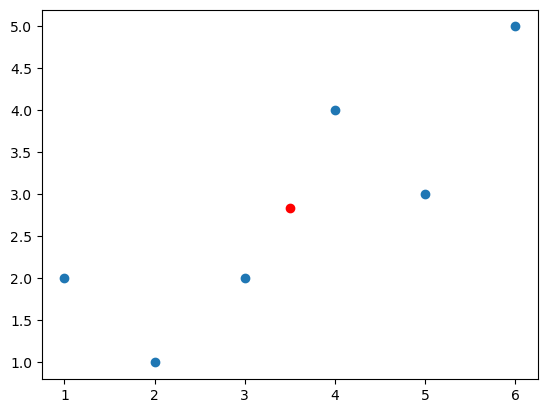

In [3]:
x1 = np.array([1, 2, 3, 4, 5, 6])
x2 = np.array([2, 1, 2, 4, 3, 5])
x1_mean = np.mean(x1)
x2_mean = np.mean(x2)
plt.scatter(x1, x2)
plt.scatter(x1_mean, x2_mean, color='red');

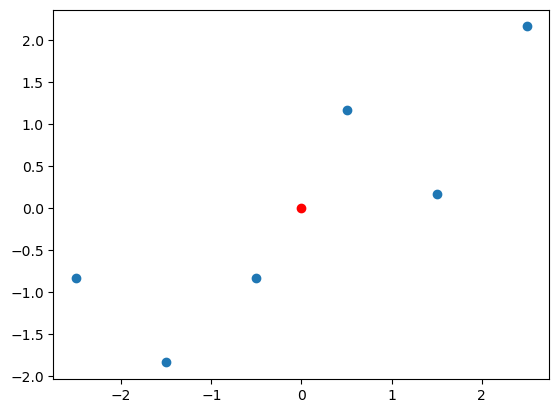

In [5]:
plt.scatter(x1 - x1_mean, x2 - x2_mean)
plt.scatter(0, 0, color='red');

- Here we shift the data by centering the means of features x1, x2 to be zero. This essentially centers the data around the point (0, 0).
- Note that the relationships between the data points does not change when compared to the original (previous) plot.
- This centering process is done in the preprocessing of the data in the PCA.

<br>

<h3 align="left">Manually implementing the PCA</h3>

**PCA steps**

- get original data
- calculate covariance matrix
- calculate eigenvectors
- sort eigenvectors by eigenvalues
- choose N largest eigenvalues
- project original data onto eigenvectors

In [7]:
df = pd.read_csv("/home/jaminkiukkonen/Desktop/ml/machine_learning/DATA/cancer_tumor_data_features.csv")

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Scale the data**

In [12]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

In [14]:
np.round(scaled_X.mean(), 10)

-0.0

In [15]:
scaled_X.shape

(569, 30)

**Calculate covariance matrix**

In [16]:
cov_mat = np.cov(scaled_X, rowvar=False)

- We don't care about the variance of every single row, but rather the variance of the features (features as displayed as column vectors).
- This is why we say *rowvar=False*.

**Calculate the eigenvectors and eigenvalues**

In [17]:
eigen_vals, eigen_vectors = np.linalg.eig(cov_mat)

- Note that these eigen values correspond to the eigenvectors (i.e., the eigenvalue with index 6 corresponds to the eigenvector with index 6).

In [19]:
eigen_vals.shape

(30,)

In [20]:
eigen_vectors.shape

(30, 30)

**Sort the eigenvectors by eigenvalues**

Let's choose N=2 components. So we choose the two eigenvectors that correspond to the largest eigenvalues.

In [45]:
# Returns the indices that would sort the array in ascending order
# This is why we write [::-1] to get the indices from largest to smallest
num_components = 2
sorted_key = np.argsort(eigen_vals)[::-1][:num_components]

In [46]:
sorted_key

array([0, 1])

In [50]:
# Let's choose N=2 as the number of components
# (i.e., we choose the eigenvectors that corresponds to the two largest eigenvalues)
eigvals, eigvecs = eigen_vals[:num_components], eigen_vectors[:, sorted_key]

In [51]:
eigvals

array([13.30499079,  5.7013746 ])

In [52]:
eigvecs.shape

(30, 2)

In [59]:
# First 5 rows
eigvecs[:5, :]

array([[ 0.21890244, -0.23385713],
       [ 0.10372458, -0.05970609],
       [ 0.22753729, -0.21518136],
       [ 0.22099499, -0.23107671],
       [ 0.14258969,  0.18611302]])

In [60]:
# Originl data --> project --> eigenvectors
# This will equal the principal components
principal_components = np.dot(scaled_X, eigvecs)

- The projection can be done using the dot product.

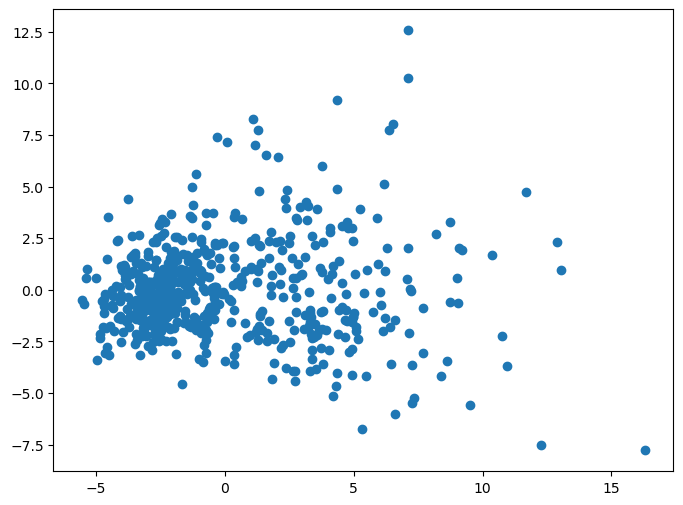

In [64]:
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(principal_components[:, 0], principal_components[:, 1]);

<br>

<h3 align="left">PCA in Sklearn</h3>

In sklearn, we still need to scale the data (for numerical stability).

In [66]:
scaler = StandardScaler()
# Recall that df contains only features (no response)
scaled_X = scaler.fit_transform(df)

In [73]:
pca_model = PCA(n_components=2)
pca_results = pca_model.fit_transform(scaled_X)

- *fit()* calculates the eigenvalues and eigenvectors
- *transform()* projects the original data onto the eigenvectors (dot product)
- *fit_transform* does these previously mentioned steps at the same time.

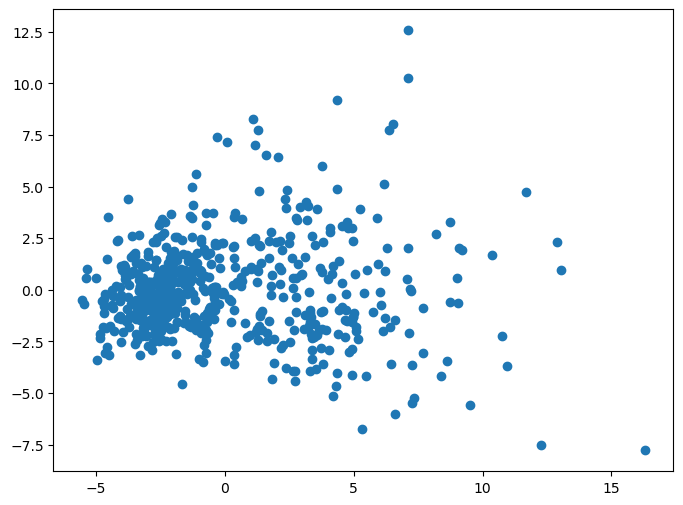

In [75]:
plt.figure(figsize=(8,6), dpi=100)
plt.scatter(pca_results[:, 0], pca_results[:, 1]);

<br>

In [76]:
pca_model.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

- The directions of the maximum variance in the data.

In [77]:
pca_model.explained_variance_ratio_

array([0.44272026, 0.18971182])

- The first principal component explains 44.3% of the data, and the second principal component explains 19% of the data.

In [79]:
np.sum(pca_model.explained_variance_ratio_) * 100

63.243207651559395

- Together the principal components 1 and 2 explain around 63% of the data.

Plot explained variance with different number of principal components

In [113]:
explained_sigmasq = np.zeros((scaled_X.shape[1], 0))

for n in range(1, 31):
    pca = PCA(n_components=n)
    pca.fit(scaled_X)
    sum_explained_var = np.sum(pca.explained_variance_ratio_)
    explained_sigmasq = np.append(explained_sigmasq, sum_explained_var)

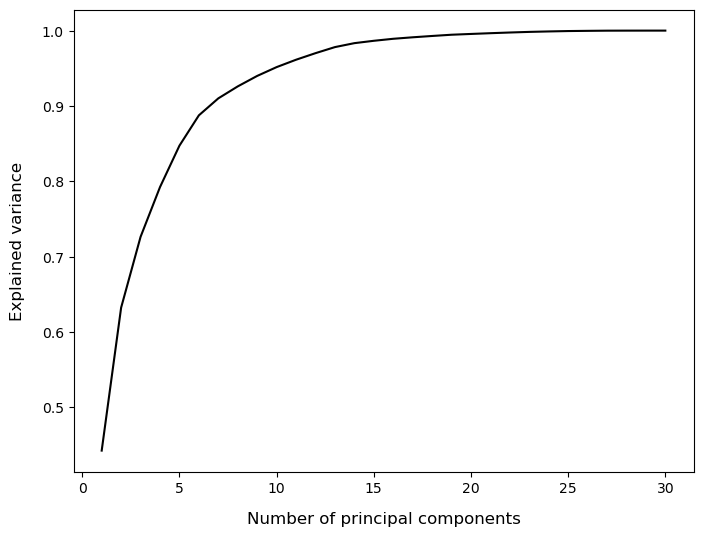

In [120]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 31), explained_sigmasq, color='black')
plt.xlabel('Number of principal components', size=12, labelpad=12)
plt.ylabel('Explained variance', size=12, labelpad=12);